In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.nonparametric.smoothers_lowess import lowess


In [20]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
data_path = "../data_files/data.xlsx"


# QIAKONG

In [21]:
# import data into a pandas dataframe.
qia = pd.read_excel(data_path, sheet_name="QIA")
# qia.tail(3)


In [22]:
qia.describe()

,Corg_pos,Corg,Corg_5pt,d34S_pos,d34S_avg,d34S_1sd,d34S_5pt,CAS_conc,d18O_avg,d18O_1sd,...,d34Spy_pos,d34Spy,d34Spy_1sd,CAS-pyr,Sr_pos,Sr,Mn,Unnamed: 19,Ccarb_pos,C_carb
count,39.000000,39.000000,39.000000,25.000000,25.000000,25.000000,25.000000,25.00000,21.000000,21.000000,...,16.000000,16.000000,16.000000,13.000000,27.000000,27.000000,27.000000,0.0,58.000000,58.000000
mean,13.300000,-27.683958,-27.658654,13.060000,28.076369,0.942409,27.604222,348.12000,15.961883,0.696748,...,11.200000,-13.406571,0.439227,42.229565,15.129630,474.303704,927.818519,NaN,13.972414,0.447241
std,6.411749,2.101833,1.959775,6.854317,5.065117,0.969106,3.084859,201.20767,1.844265,0.424193,...,4.058243,5.108353,0.729815,7.537629,9.039691,216.052128,1263.379835,NaN,8.416250,2.384502
min,1.400000,-31.758147,-31.239260,1.400000,20.602673,0.243385,21.612469,164.00000,11.574906,0.510000,...,4.100000,-21.576973,0.012092,25.335791,0.100000,156.600000,193.700000,NaN,0.100000,-2.870000
25%,9.600000,-29.510130,-29.298790,8.300000,23.748996,0.350000,25.347177,245.00000,15.274122,0.510000,...,9.700000,-15.649913,0.137197,40.659744,7.850000,294.550000,349.050000,NaN,7.175000,-2.185000
50%,13.400000,-26.825249,-26.482300,12.900000,27.695217,0.599146,28.551535,285.00000,16.274963,0.510000,...,12.200000,-13.627957,0.301369,43.210957,15.000000,520.300000,399.400000,NaN,13.500000,0.940000
75%,17.150000,-26.075380,-26.188975,19.200000,31.839221,1.000891,30.184903,380.00000,16.921045,0.510000,...,13.175000,-11.802480,0.456431,44.837281,20.650000,610.850000,761.100000,NaN,19.575000,2.592500
max,25.000000,-25.314586,-25.560550,24.000000,41.158266,4.191960,31.847193,1062.00000,19.616548,1.836438,...,17.600000,-2.608645,3.100000,56.171808,32.000000,920.300000,5093.400000,NaN,32.000000,4.430000


In [23]:
ccarb = qia.C_carb
pos_ccarb = qia.Ccarb_pos
corg = qia.Corg
pos_corg = qia.Corg_pos
corg_5pt = qia.Corg_5pt
d34S = qia.d34S_avg
pos_d34S = qia.d34S_pos 
d18O = qia.d18O_avg
pos_d18O = qia.d18O_pos
d34Spy = qia.d34Spy
pos_d34Spy = qia.d34Spy_pos
d34S_err = qia.d34S_1sd
d18O_err = qia.d18O_1sd
d34Spy_err = qia.d34Spy_1sd
d34S_5pt = qia.d34S_5pt
pos_Sr = qia.Sr_pos
Mn_Sr = qia.Mn/qia.Sr
CAS_pyr = qia["CAS-pyr"]

In [24]:
label_Corg = r'$\delta^{13}C_{org}\;(‰\;VPDB)$'
label_Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
label_d34Spy = r'$\delta^{34}S_{CRS}\;(‰\;VCDT)$'
label_d13Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_MnSr = r'$Mn/Sr$'
label_CAS_pyr = r'$\Delta^{34}S_{CAS-pyr}\;(‰)$'

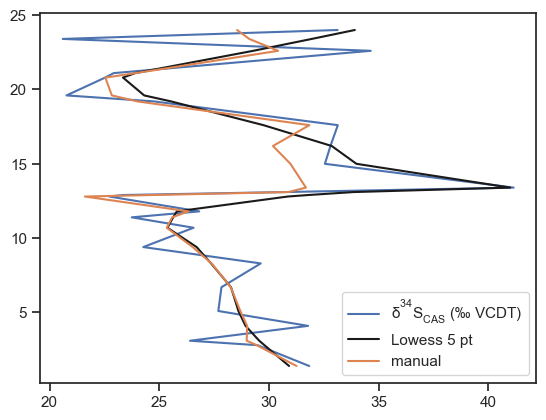

In [25]:
x1 = corg
y1 = pos_corg

x2=d34S
y2=pos_d34S

x3 = d18O
y3=pos_d18O

x4=d34Spy
y4=pos_d34Spy

x5 = CAS_pyr

s_factor = 0.25 # a smoothing factor of 0.25 is used.
smoothed_corg = lowess(x1, y1, frac=s_factor) 
smoothed_d34S = lowess(x2, y2, frac=s_factor)
smoothed_d18O = lowess(x3, y3, frac=s_factor)
smoothed_d34Spy = lowess(x4, y4, frac=s_factor)
smoothed_CAS_pyr = lowess(x5, y4, frac=s_factor)
smoothed_Mn_Sr = lowess(Mn_Sr, pos_Sr, frac=s_factor)
smoothed_ccarb = lowess(ccarb, pos_ccarb, frac=s_factor)

# plot data
plt.plot(x2, y2, label = label_d34S)
plt.plot(smoothed_d34S[:,1],smoothed_d34S[:,0], c = 'k', label = 'Lowess 5 pt')
plt.plot(d34S_5pt,y2,label = 'manual')
plt.legend()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


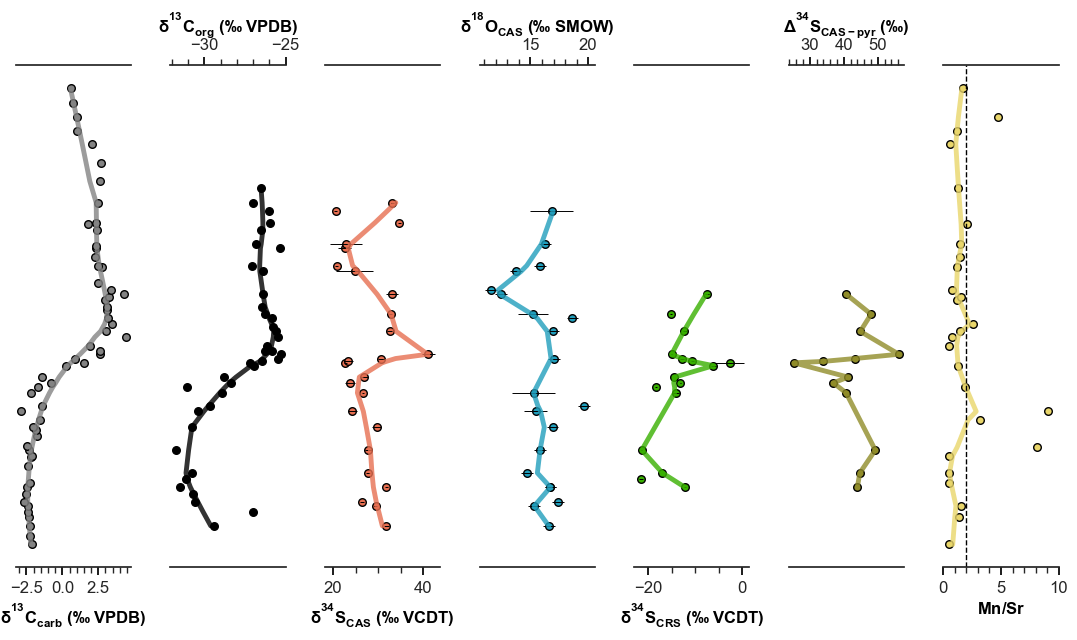

In [26]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(11, 5.65),  # constrained_layout=True,
                         ncols=7, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5, ax6 = axes
axes_ = [ax0,ax1,ax2,ax3, ax4, ax5, ax6]

x_axis = [ccarb, corg, d34S, d18O, d34Spy, CAS_pyr, Mn_Sr]
y_axis = [pos_ccarb, pos_corg, pos_d34S,
          pos_d18O, pos_d34Spy, pos_d34Spy, pos_Sr]
labels = [label_Ccarb, label_Corg, label_d34S, label_d18O, label_d34Spy, label_CAS_pyr, label_MnSr]
color = ["#838383", 'black', "#e76f51",
         "#219ebc", "#38b000", "#908C29", "#E9D66B"]
smoothed = [smoothed_ccarb, smoothed_corg, smoothed_d34S,
            smoothed_d18O, smoothed_d34Spy, smoothed_CAS_pyr, smoothed_Mn_Sr, ]
x_error = [d34S_err, d18O_err, d34Spy_err]
err_axes = [ax2, ax3, ax4]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])
plt.tight_layout()

def scatter_plot(data, f_size):
    for i in range(len(axes_)):
        sns.scatterplot(data = data,x=x_axis[i], y=y_axis[i], ax=axes_[i],
                        color=color[i], legend=False, edgecolor='black',
                        s=30, linewidth=1,
                        )
        axes_[i].tick_params(labelsize=f_size, color= "black")
        axes_[i].set_xlabel(labels[i], fontsize=f_size,
                              c="black", fontweight="bold")
        axes_[i].minorticks_on()
        # Set the x-axis position based on the subplot index
        if i % 2 == 0:
            axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
            axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
        else:
            axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
            axes_[i].xaxis.set_label_position('top')  # x-axis at the top

# plot error bars.
def error_bar():
    for i in range(len(x_error)):
        err_axes[i].errorbar(xerr=x_error[i], x=x_axis[i+2], y=y_axis[i+2],
                            ecolor="black", color="black",
                            linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')

# plot lowess smoothed lineplot
def smoothed_line():
    for i in range(len(axes_)):
        axes_[i].plot(smoothed[i][:, 1], smoothed[i][:, 0],
                    c=color[i], linewidth=3.5, alpha=.8)

scatter_plot(qia, 12)
error_bar()
smoothed_line()
ax6.set_xlim(0, 10)
ax6.axvline(x=2, linestyle='dashed', color='black', linewidth=1)

plt.savefig(f"{save_path}qiakong.pdf", dpi=600)


# Jebel Aweri

In [27]:
ja = pd.read_excel(data_path, sheet_name="JA")
ja.head(3)

,d34S_pos,d34S_avg,d34S_1sd,d34S_5pt,CAS_conc,d18O_pos,d18O_avg,d18O_1sd,Corg_pos,Corg,Sr_pos,Sr,Mn,Ccarb_pos,C_carb,Sr_iso_pos,Sr_iso
0,0.10,24.769263,0.32762,25.012725,176.0,0.10,24.034605,0.510000,0.10,-28.557240,0.7,245.4,401.3,0.10,1.882292,0.10,0.707922
1,1.65,25.838897,0.30000,25.421815,33.0,1.65,25.655099,0.510000,1.40,-27.226533,2.5,210.6,277.5,0.70,2.477079,1.25,0.708016
2,3.10,25.868199,0.30000,25.766222,96.0,3.90,25.798056,0.385642,1.65,-27.377008,3.3,295.6,257.7,1.25,2.441586,8.40,0.708075


In [28]:
ja.describe()

,d34S_pos,d34S_avg,d34S_1sd,d34S_5pt,CAS_conc,d18O_pos,d18O_avg,d18O_1sd,Corg_pos,Corg,Sr_pos,Sr,Mn,Ccarb_pos,C_carb,Sr_iso_pos,Sr_iso
count,25.000000,25.000000,25.000000,25.000000,25.000000,28.000000,28.000000,28.000000,35.000000,35.000000,29.000000,29.000000,29.000000,40.000000,40.000000,9.000000,9.000000
mean,15.650000,27.592823,0.680551,27.489915,499.000000,16.026786,20.980703,1.032492,14.390000,-25.678585,18.375862,232.544828,368.496552,17.505000,3.898656,14.211111,0.708074
std,8.711738,1.759958,0.471247,1.512794,1020.781482,7.917286,3.442467,1.107056,8.060185,1.487545,8.878391,69.309609,211.647201,10.345659,1.632848,10.075117,0.000101
min,0.100000,24.769263,0.165530,25.012725,33.000000,0.100000,14.188943,0.295015,0.100000,-28.557240,0.700000,116.200000,96.300000,0.100000,1.215219,0.100000,0.707922
25%,9.100000,25.966898,0.300000,26.571696,96.000000,9.850000,18.840000,0.510000,7.950000,-26.996743,13.200000,184.900000,214.700000,9.775000,2.468205,8.400000,0.708037
50%,16.450000,27.504730,0.625770,27.253470,183.000000,17.025000,21.383829,0.510000,15.600000,-26.000272,18.500000,211.200000,285.900000,19.500000,3.633059,14.800000,0.708045
75%,21.950000,28.776812,0.842222,28.500339,332.000000,21.537500,23.549370,0.842997,19.850000,-24.215532,26.300000,291.500000,451.700000,26.475000,5.281196,19.400000,0.708075
max,30.400000,31.275788,2.318488,30.843775,4893.000000,28.600000,26.165824,4.755877,28.600000,-23.391203,30.900000,370.600000,865.100000,30.900000,7.389945,30.600000,0.708263


In [29]:
ccarb = ja.C_carb
pos_ccarb = ja.Ccarb_pos
corg = ja.Corg
pos_corg = ja.Corg_pos
d34S = ja.d34S_avg
pos_d34S = ja.d34S_pos
d18O = ja.d18O_avg
pos_d18O = ja.d18O_pos
d34S_err = ja.d34S_1sd
d18O_err = ja.d18O_1sd
pos_Sr = ja.Sr_pos
Mn_Sr = ja.Mn/ja.Sr
pos_Sriso = ja.Sr_iso_pos
Sriso = ja.Sr_iso

# smoothed data for Jebel Aweri.
smoothed_corg = lowess(corg, pos_corg, frac=s_factor)
smoothed_d34S = lowess(d34S, pos_d34S, frac=s_factor)
smoothed_d18O = lowess(d18O, pos_d18O, frac=s_factor)
smoothed_Mn_Sr = lowess(Mn_Sr, pos_Sr, frac=s_factor)
smoothed_ccarb = lowess(ccarb, pos_ccarb, frac=s_factor)
smoothed_Sriso = lowess(Sriso, pos_Sriso, frac=s_factor)
color = ["#838383",'black', "#e76f51", "#219ebc", "#E9D66B"]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


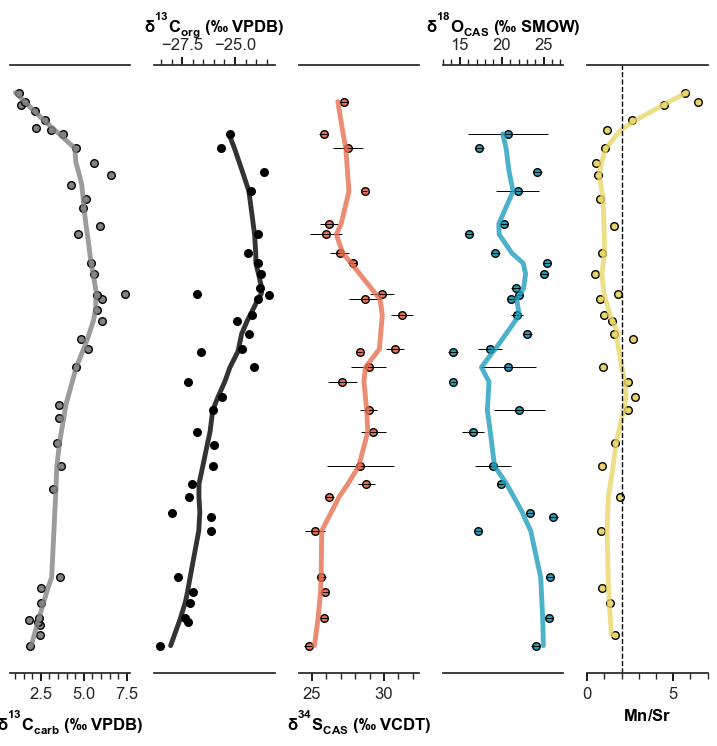

In [30]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(9, 7.9),  # constrained_layout=True,
                         ncols=5, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4 = axes
axes_ = [ax0, ax1, ax2, ax3, ax4]

x_axis = [ccarb, corg, d34S, d18O, Mn_Sr]
y_axis = [pos_ccarb, pos_corg, pos_d34S, pos_d18O, pos_Sr]
labels = [label_Ccarb, label_Corg, label_d34S, label_d18O, label_MnSr]
smoothed = [smoothed_ccarb, smoothed_corg, smoothed_d34S, smoothed_d18O, smoothed_Mn_Sr]
x_error = [d34S_err, d18O_err]
err_axes = [ax2, ax3]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

scatter_plot(ja, 12)

error_bar()
smoothed_line()
ax4.set_xlim(0,7)
ax4.axvline(x=2, linewidth=1, color='black', linestyle='--')   
plt.savefig(f"{save_path}JA.pdf", dpi=600)


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


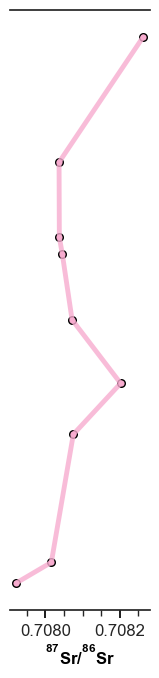

In [31]:
fig, axes = plt.subplots(figsize=(1.8, 7.8),  # constrained_layout=True,
                         ncols=1, nrows=1, sharey=True)
ax0 = axes
label_Sr = r'$^{87}Sr/^{86}Sr$'
f_size = 12
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

sns.scatterplot(x=Sriso, y=pos_Sriso, ax=ax0,
                color="#f7accf", legend=False, edgecolor='black',
                s=30, linewidth=1,
                )
ax0.tick_params(labelsize=f_size, color="black")
ax0.set_xlabel(label_Sr, fontsize=f_size,
                    c="black", fontweight="bold")
ax0.minorticks_on()
ax0.plot(smoothed_Sriso[:, 1], smoothed_Sriso[:, 0],
                    c="#f7accf", linewidth=3.5, alpha=.8)

plt.savefig("../figures/JA_Sr.pdf", dpi=600)

# Wadi Musjah

In [32]:
wmj = pd.read_excel(data_path, sheet_name="WMJ")
wmj.head(3)


,d34S_pos,d34S_avg,d34S_1sd,d34S_5pt,CAS_conc,Unnamed: 5,d18O_pos,d18O_avg,d18O_1sd,Unnamed: 9,...,Unnamed: 12,Ccarb_pos,C_carb,Unnamed: 15,Sr_pos,Sr,Mn,Unnamed: 19,Sr_iso,Sr_iso_pos
0,0.09,21.949101,0.3,21.913883,714.0,NaN,0.09,14.554073,0.51,NaN,...,NaN,0.09,0.719940,NaN,0.40,68.4,162.3,NaN,0.707835,0.09
1,0.71,23.750000,0.3,24.200300,49.0,NaN,0.71,14.794042,0.51,NaN,...,NaN,0.25,0.590869,NaN,1.10,113.1,163.9,NaN,0.707880,0.40
2,0.95,26.470000,0.3,24.897674,49.0,NaN,0.95,19.581747,0.51,NaN,...,NaN,0.40,-0.394212,NaN,1.85,107.2,115.0,NaN,0.707835,0.88


In [33]:
wmj.describe()

,d34S_pos,d34S_avg,d34S_1sd,d34S_5pt,CAS_conc,Unnamed: 5,d18O_pos,d18O_avg,d18O_1sd,Unnamed: 9,...,Unnamed: 12,Ccarb_pos,C_carb,Unnamed: 15,Sr_pos,Sr,Mn,Unnamed: 19,Sr_iso,Sr_iso_pos
count,21.000000,21.000000,21.000000,21.000000,21.000000,0.0,16.000000,16.000000,16.000000,0.0,...,0.0,28.000000,28.000000,0.0,11.000000,11.000000,11.000000,0.0,30.000000,30.000000
mean,2.627381,25.209726,0.418735,25.253954,227.904762,NaN,2.622187,17.213279,0.552722,NaN,...,NaN,2.326786,1.817023,NaN,2.555000,127.300000,196.509091,NaN,0.707919,2.600500
std,1.250284,1.862142,0.281880,1.536461,230.728825,NaN,1.418169,3.370478,0.103637,NaN,...,NaN,1.289620,1.460549,NaN,1.165751,36.365066,99.764668,NaN,0.000058,1.154065
min,0.090000,21.949101,0.119112,21.913883,4.000000,NaN,0.090000,12.298454,0.450000,NaN,...,NaN,0.090000,-0.507786,NaN,0.400000,68.400000,115.000000,NaN,0.707752,0.090000
25%,1.850000,23.817517,0.300000,24.667339,49.000000,NaN,1.325000,14.734049,0.510000,NaN,...,NaN,1.350000,0.708317,NaN,2.015000,112.200000,144.400000,NaN,0.707894,1.882500
50%,2.800000,25.202633,0.300000,25.368081,175.000000,NaN,2.920000,16.875000,0.510000,NaN,...,NaN,2.405000,1.592195,NaN,2.630000,117.500000,163.900000,NaN,0.707915,2.590000
75%,3.400000,26.930000,0.429781,26.241779,270.000000,NaN,3.750000,19.334646,0.557000,NaN,...,NaN,3.287500,3.155596,NaN,3.220000,139.000000,205.850000,NaN,0.707947,3.362500
max,4.640000,28.388699,1.299743,28.404375,714.000000,NaN,4.640000,25.723920,0.917550,NaN,...,NaN,4.520000,4.214760,NaN,4.385000,217.600000,481.100000,NaN,0.708043,4.640000


In [34]:
ccarb = wmj.C_carb
pos_ccarb = wmj.Ccarb_pos
d34S = wmj.d34S_avg
pos_d34S = wmj.d34S_pos
d18O = wmj.d18O_avg
pos_d18O = wmj.d18O_pos
d34S_err = wmj.d34S_1sd
d18O_err = wmj.d18O_1sd
pos_Sr = wmj.Sr_pos
Mn_Sr = wmj.Mn/wmj.Sr
corg = wmj.Corg
pos_corg = wmj.Corg_pos
pos_Sriso = wmj.Sr_iso_pos
Sriso = wmj.Sr_iso

# smoothed data for WMJ.
smoothed_ccarb = lowess(ccarb, pos_ccarb, frac=s_factor)
smoothed_d34S = lowess(d34S, pos_d34S, frac=s_factor)
smoothed_d18O = lowess(d18O, pos_d18O, frac=s_factor)
smoothed_Mn_Sr = lowess(Mn_Sr, pos_Sr, frac=s_factor)
smoothed_corg = lowess(corg, pos_corg, frac=s_factor)
smoothed_Sriso = lowess(Sriso, pos_Sriso, frac=s_factor)


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


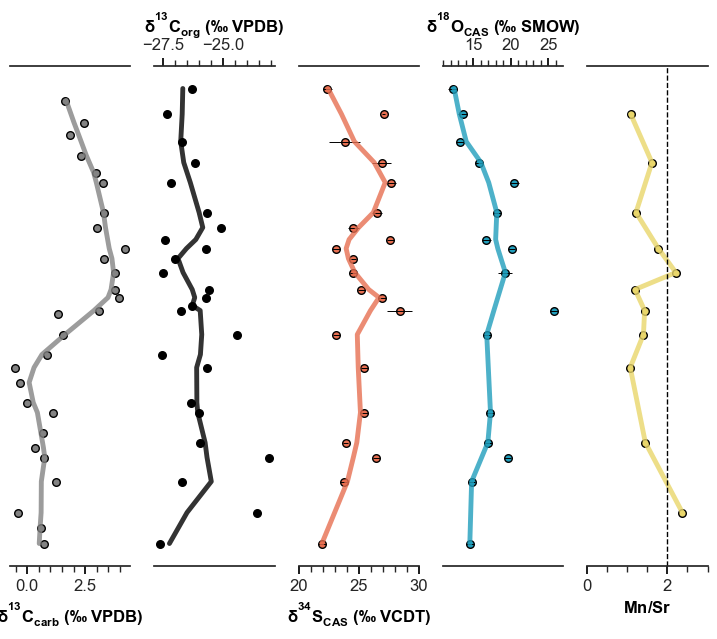

In [36]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(9, 6.5),  # constrained_layout=True,
                         ncols=5, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4 = axes
axes_ = [ax0, ax1, ax2, ax3, ax4]

x_axis = [ccarb, corg, d34S, d18O, Mn_Sr]
y_axis = [pos_ccarb, pos_corg, pos_d34S, pos_d18O, pos_Sr]
labels = [label_Ccarb, label_Corg, label_d34S, label_d18O, label_MnSr]
smoothed = [smoothed_ccarb, smoothed_corg, smoothed_d34S, smoothed_d18O, smoothed_Mn_Sr]
x_error = [d34S_err, d18O_err]
err_axes = [ax2, ax3]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

scatter_plot(wmj, 12)
error_bar()
smoothed_line()
ax2.set_xlim(20,30)
ax4.set_xlim(0,3)
ax4.axvline(x=2, linewidth=1, color='black', linestyle='--')   
plt.savefig(f"{save_path}WMJ.pdf", dpi=600)
np.savetxt('smoothed_wmj.txt', smoothed_d34S)

Sr_isotopes

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


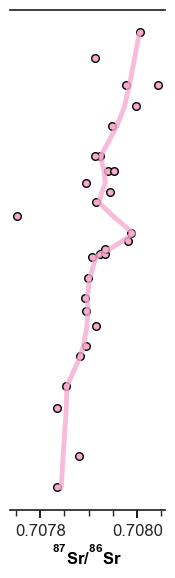

In [ ]:
fig, axes = plt.subplots(figsize=(2, 6.5),  # constrained_layout=True,
                         ncols=1, nrows=1, sharey=True)
ax0 = axes
label_Sr = r'$^{87}Sr/^{86}Sr$'
f_size = 12
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

sns.scatterplot(x=Sriso, y=pos_Sriso, ax=ax0,
                color="#f7accf", legend=False, edgecolor='black',
                s=30, linewidth=1,
                )
ax0.tick_params(labelsize=f_size, color="black")
ax0.set_xlabel(label_Sr, fontsize=f_size,
                    c="black", fontweight="bold")
ax0.minorticks_on()
ax0.plot(smoothed_Sriso[:, 1], smoothed_Sriso[:, 0],
                    c="#f7accf", linewidth=3.5, alpha=.8)

plt.savefig("../figures/WMJ_Sr.pdf", dpi=600)